# Satranç Kazanan Tahmini

## Problemin Türü
Amaç: Oynanan hamleler incelenerek kazananı belirlemek. 

Etiketlerimiz belli ve kategorik olduğu için Sınıflandırma Problemi.

Açılış kodları --> https://www.365chess.com/eco.php

## Veriseti
* **id**: Oyun numarası, nümerik
* **rated**: Değerlendime, kategorik
* **created_at**: Başlangıç zamanı, nümerik
* **last_move_at**: Bitiş zamanı, nümerik
* **turns**: Hamle sayısı, nümerik
* **victory_status**: Kazanan nasıl kazandı, kategorik
* **winner**: Kazanan renk, kategorik
* **increment_code**: Oyunun zaman türü, nümerik
* **white_id**: Beyaz taşlarda ki oyuncunun numarası, nümerik
* **black_id**: Siyah taşlarda ki oyuncunun numarası, nümerik
* **white_rating**: Beyaz taşlarda ki oyuncunun puanı, nümerik
* **black_rating**: Siyah taşlarda ki oyuncunun puanı, nümerik
* **moves**: Hamleler, nümerik
* **opening_eco**: Açılışın kodu, kategorik
* **opening_name**: Açılışın ismi, kategorik
* **opening_ply**: Açılış fazı kaç hamlede tamamlandı, nümerik

## Karışıklık Matrisi

**TP:** Kazanacak kişiye kazandı demek.

**TN:** Kaybedecek kişiye kaybetti demek.

**FP:** Kaybedecek kişiye kazandı demek.

**FN:** Kazanacak kişiye kaybetti demek.

**Kullanılacak Metrik:** Accuracy

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('games.csv')

[Text(0.5, 0, 'Kazanan'), Text(0.5, 1.0, 'Kazananın Renklere Göre Sayısı')]

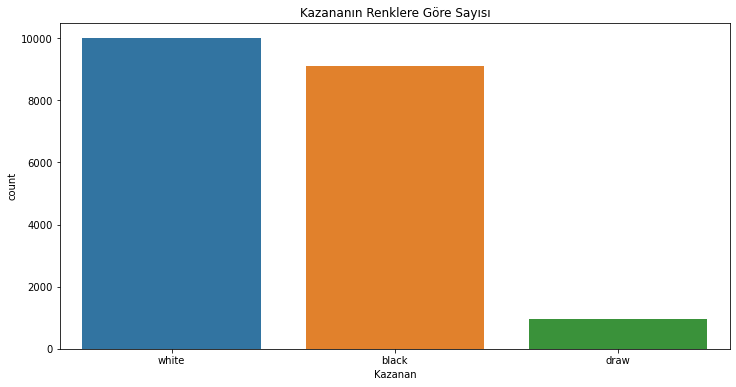

In [43]:
plt.figure(figsize=(12,6))
ax = sns.countplot( x = df['winner'], data = df)
ax.set(xlabel = 'Kazanan', title = 'Kazananın Renklere Göre Sayısı')

Bu grafikten beyazın kazanma ihtimalinin daha yüksek olduğu anlaşılıyor.

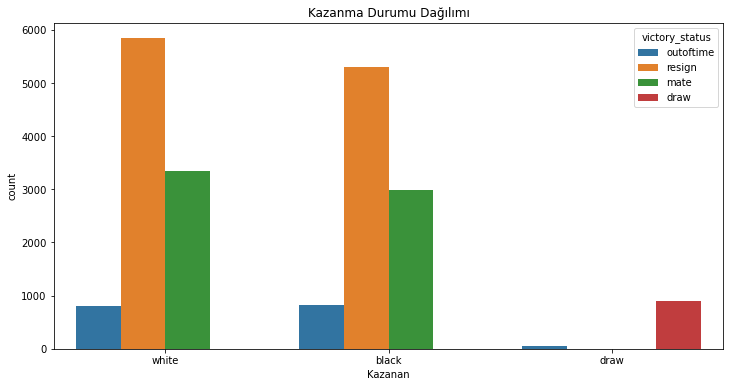

In [42]:
plt.figure(figsize=(12,6))
ax = sns.countplot( x = 'winner', hue = 'victory_status', data = df)
ax_attr = ax.set(xlabel = 'Kazanan', title = 'Kazanma Durumu Dağılımı')

**Dipnot:** draw' durumunda 'outoftime' olma ihtimali düşüktür. Bu ihtimalin gerçekleşmesi için bir oyuncu belirlenen süre içinde belirlenen hamle sayısını tamamlamazsa, oyun oyuncu tarafından kaybedilir. Ancak oyun eğer pozisyon rakip oyuncunun şahını olası herhangi bir yasal hamle dizisi ile mat edemeyecek şekilde ise berabere biter.

In [22]:
black_black = df['black_rating'][df['winner'] == 'black'].mean()
black_white = df['black_rating'][df['winner'] == 'white'].mean()
white_black = df['white_rating'][df['winner'] == 'black'].mean()
white_white = df['white_rating'][df['winner'] == 'white'].mean()
print("Siyah kazandığında siyahın ortalama derecesi =", round(black_black, 3))
print("Siyah kaybettiğinde siyahın ortalama derecesi =", round(black_white, 3))
print("Beyaz kazandığında beyazın ortalama derecesi =", round(white_white, 3))
print("Beyaz kaybettiğinde beyazın ortalama derecesi=", round(white_black, 3))

Siyah kazandığında siyahın ortalama derecesi = 1638.227
Siyah kaybettiğinde siyahın ortalama derecesi = 1538.877
Beyaz kazandığında beyazın ortalama derecesi = 1634.184
Beyaz kaybettiğinde beyazın ortalama derecesi= 1549.246


Kazanma ihtimali derecesi yüksek olan için daha yüksektir.

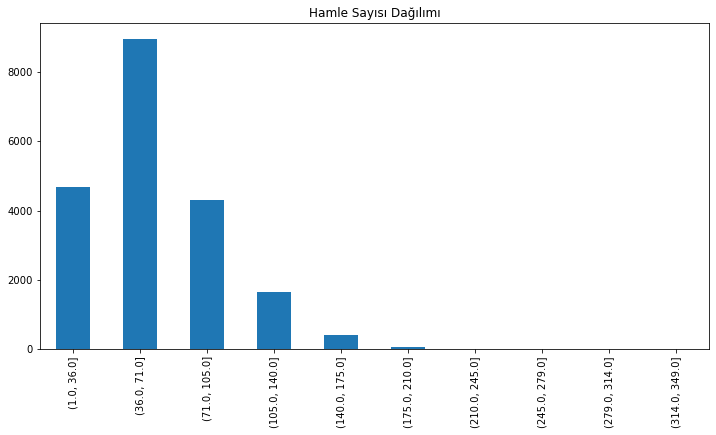

In [31]:
plt.figure(figsize=(12,6))
ax = pd.cut(df['turns'], 10, precision=0).value_counts().sort_index().plot.bar()
ax_attr = ax.set(title = "Hamle Sayısı Dağılımı")

In [35]:
print("Ortalama Hamle Sayısı:" ,round(df['turns'].mean(), 3))
print("En Yüksek Hamle Sayısı:" ,df['turns'].max())
print("En Düşük Hamle Sayısı:" ,df['turns'].min())

Ortalama Hamle Sayısı: 60.466
En Yüksek Hamle Sayısı: 349
En Düşük Hamle Sayısı: 1


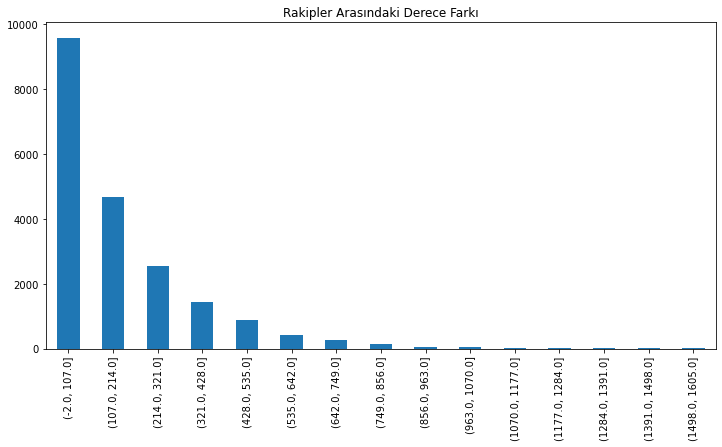

In [44]:
df["rating_diff"] = abs(df['white_rating'] - df['black_rating'])

plt.figure(figsize=(12,6))
ax = pd.cut(df["rating_diff"], 15, precision = 0).value_counts().sort_index().plot.bar()
ax_attr = ax.set(title = "Rakipler Arasındaki Derece Farkı")

In [36]:
print("Ortalama Derece Farkı:" ,round(df['rating_diff'].mean(), 3))
print("En Yüksek Derece Farkı:" ,df['rating_diff'].max())
print("En Düşük Derece Farkı:" ,df['rating_diff'].min())

Ortalama Derece Farkı: 173.091
En Yüksek Derece Farkı: 1605
En Düşük Derece Farkı: 0
